### Analyzing tweakreg shifts

Author: Karl Gordon

5 Jul 2022

In [1]:
from tweakwcs import JWSTgWCS
from jwst import datamodels
from astropy.stats import sigma_clip
import numpy as np
import glob

In [6]:
n_tiles = 5
n_images_per_tile = 10

In [3]:
RAD2ARCSEC = 3600.0 * np.rad2deg(1.0)

filter = "F560W"
twfiles = np.sort(glob.glob(f"./{filter}/stage3/*wcs_tweakreg.fits"))

shifts = np.zeros((2, len(twfiles)))
for k, cfile in enumerate(twfiles):
    # extract x,y shifts from the aligned image:
    aligned_model = datamodels.open(cfile)
    matrix = aligned_model.meta.wcs.forward_transform['tp_affine'].matrix.value
    cshift = RAD2ARCSEC * aligned_model.meta.wcs.forward_transform['tp_affine'].translation.value
    shifts[:, k] = cshift
    print(cfile, cshift, aligned_model.meta.guidestar.gs_id)

./F560W/stage3/jw01040001001_03101_00001_mirimage_fixed_wcs_tweakreg.fits [ 0.1046129  -0.10911081] S1HP090792
./F560W/stage3/jw01040001001_03101_00002_mirimage_fixed_wcs_tweakreg.fits [ 0.11033027 -0.11822098] S1HP090792
./F560W/stage3/jw01040001001_03101_00003_mirimage_fixed_wcs_tweakreg.fits [ 0.09954632 -0.11549697] S1HP090792
./F560W/stage3/jw01040001001_03101_00004_mirimage_fixed_wcs_tweakreg.fits [ 0.10440985 -0.11558269] S1HP090792
./F560W/stage3/jw01040001001_03101_00005_mirimage_fixed_wcs_tweakreg.fits [ 0.10531285 -0.11122491] S1HP090792
./F560W/stage3/jw01040001001_0310j_00001_mirimage_fixed_wcs_tweakreg.fits [ 0.10934406 -0.11607055] S1HP090792
./F560W/stage3/jw01040001001_0310j_00002_mirimage_fixed_wcs_tweakreg.fits [ 0.10699728 -0.12492857] S1HP090792
./F560W/stage3/jw01040001001_0310j_00003_mirimage_fixed_wcs_tweakreg.fits [ 0.1052372  -0.11965154] S1HP090792
./F560W/stage3/jw01040001001_0310j_00004_mirimage_fixed_wcs_tweakreg.fits [ 0.10873223 -0.12227168] S1HP090792
.

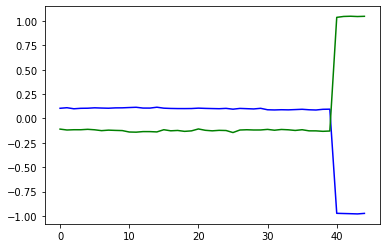

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(len(twfiles)), shifts[0, :], "b-")
plt.plot(range(len(twfiles)), shifts[1, :], "g-")

In [7]:
# determine the aveage values for each tile
#    set the range to be the number of tiles and the 
for k in range(n_tiles):
    k1 = k * n_images_per_tile
    k2 = k1 + n_images_per_tile
    avex = np.average(sigma_clip(shifts[0, k1:k2]))
    avey = np.average(sigma_clip(shifts[1, k1:k2]))
    print(k, avex, avey)

0 0.10637643165419682 -0.11768223374643519
1 0.10700657405766205 -0.13107961726782408
2 0.10163923831678442 -0.12152158617752193
3 0.09065352553736802 -0.12144904023219313
4 -0.975754312382031 1.0456499145482434
